<a href="https://colab.research.google.com/github/bubu59/Insurance_prediction/blob/main/insurance_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/bubu59/Insurance_prediction/main/insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [3]:
pip install pycaret 

     |████████████████████████████████| 266 kB 33.5 MB/s 
     |████████████████████████████████| 271 kB 59.4 MB/s 
     |████████████████████████████████| 1.7 MB 59.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 74.6 MB/s 
     |████████████████████████████████| 167 kB 80.1 MB/s 
     |████████████████████████████████| 1.3 MB 39.0 MB/s 
     |████████████████████████████████| 2.0 MB 54.3 MB/s 
     |████████████████████████████████| 6.8 MB 55.4 MB/s 
     |████████████████████████████████| 111 kB 65.5 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 14.6 MB 111 kB/s 
     |████████████████████████████████| 80 kB 11.6 MB/s 
     |████████████████████████████████| 10.1 MB 42.6 MB/s 
     |████████████████████████████████| 3.1 MB 57.6 MB/s 
     |███████████████

In [12]:
from pycaret.regression import*

r1 = setup(data=df, target='charges', session_id=100,normalize=True, normalize_method='minmax', polynomial_features=True, 
           trigonometry_features=True, feature_interaction=True)

,Description,Value
0,session_id,100
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 21)"


In [13]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2778.5013,2.463687e+07,4893.1280,0.8183,0.4611,0.3403,0.143
llar,Lasso Least Angle Regression,3054.6572,2.547942e+07,4972.0717,0.8116,0.4258,0.3247,0.015
lasso,Lasso Regression,3041.2642,2.548627e+07,4974.7395,0.8114,0.4243,0.3184,0.021
br,Bayesian Ridge,3064.2967,2.561137e+07,4983.6736,0.8108,0.4270,0.3196,0.014
lr,Linear Regression,3028.1782,2.555418e+07,4980.1356,0.8104,0.4318,0.3265,0.012
rf,Random Forest Regressor,2805.2944,2.597572e+07,5043.1795,0.8099,0.4787,0.3378,0.661
ridge,Ridge Regression,3099.5129,2.583782e+07,5003.7377,0.8095,0.4224,0.3190,0.012
omp,Orthogonal Matching Pursuit,3125.5212,2.604703e+07,5025.1489,0.8068,0.4586,0.3649,0.012
lightgbm,Light Gradient Boosting Machine,3048.7116,2.678907e+07,5097.0979,0.8042,0.5393,0.3802,0.098
huber,Huber Regressor,2117.3893,2.759075e+07,5143.9330,0.7969,0.3857,0.0887,0.050


In [14]:
gbr_model = create_model('gbr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3398.6197,3.966945e+07,6298.3687,0.5846,0.5384,0.3292
1,2508.0373,1.594452e+07,3993.0585,0.8722,0.3464,0.3023
2,3014.3349,2.848844e+07,5337.4563,0.8352,0.4252,0.3209
3,2800.0161,2.136178e+07,4621.8810,0.9002,0.4417,0.3208
4,2809.5787,2.933489e+07,5416.1693,0.8172,0.4784,0.3246
5,2784.7475,2.822758e+07,5312.9631,0.7828,0.5125,0.3279
6,3293.5718,3.432193e+07,5858.4917,0.7785,0.5755,0.4290
7,2540.4718,1.735152e+07,4165.5160,0.8277,0.4941,0.4066
8,2567.1168,1.862001e+07,4315.0905,0.8790,0.3735,0.3199
9,2068.5186,1.304860e+07,3612.2847,0.9058,0.4249,0.3224


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

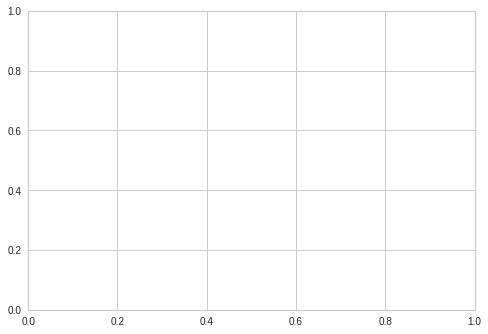

In [15]:
evaluate_model(gbr_model)


In [16]:
predict_model(gbr_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2556.072,1.713269e+07,4139.1648,0.882,0.3925,0.3084


,age,bmi,age_Power2,bmi_Power2,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_Power2_multiply_smoker_yes,age_Power2_multiply_age,smoker_yes_multiply_age_Power2,bmi_Power2_multiply_bmi,smoker_yes_multiply_bmi,charges,Label
0,0.108696,0.496099,0.054348,0.361609,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.005907,0.0,0.179394,0.000000,1826.843018,3962.745136
1,0.217391,0.310465,0.121951,0.195293,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.026511,0.0,0.060632,0.000000,20177.671875,6452.589615
2,0.565217,0.314366,0.427360,0.198407,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.241551,0.0,0.062373,0.000000,7421.194336,9932.091562
3,0.043478,0.417003,0.020148,0.286210,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000876,0.0,0.119351,0.000000,1877.929443,3472.288785
4,0.000000,0.247915,0.000000,0.147604,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.147604,0.000000,0.0,0.036593,0.247915,15518.180664,15289.774768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.000000,0.517622,0.000000,0.383290,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.198399,0.000000,1727.540039,3601.295127
398,0.239130,0.424267,0.137063,0.292854,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.032776,0.0,0.124248,0.000000,4433.387695,7072.159972
399,0.130435,0.383374,0.066808,0.256193,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.008714,0.0,0.098218,0.000000,4618.080078,6111.941788
400,0.347826,0.534167,0.220573,0.400297,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.076721,0.0,0.213825,0.000000,4320.410645,5334.772341


In [17]:
save_model(gbr_model, model_name = 'gradient_boosted_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           